<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/nlp-with-transformers/blob/main/06_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="ÏΩîÎû©ÏóêÏÑú Ïã§ÌñâÌïòÍ∏∞"/></a>
</td></tr></table>

Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÑ ÏΩîÎû©ÏóêÏÑú Ïã§ÌñâÌïòÎ†§Î©¥ Pro Î≤ÑÏ†ÑÏù¥ ÌïÑÏöîÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [1]:
# ÏΩîÎû©ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏúºÎ©¥ Îã§Ïùå ÏΩîÎìúÎ•º Ï£ºÏÑù Ï≤òÎ¶¨ÌïòÏÑ∏Ïöî.
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=6)

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 653 (delta 47), reused 15 (delta 8), pack-reused 569
Receiving objects: 100% (653/653), 62.41 MiB | 20.09 MiB/s, done.
Resolving deltas: 100% (335/335), done.
/content/nlp-with-transformers
‚è≥ Installing base requirements ...
‚úÖ Base requirements installed!
Using transformers v4.35.2
Using datasets v2.17.0
Using accelerate v0.27.0
Using sentencepiece v0.1.99
Using sacrebleu v2.4.0
Using rouge_score
Using nltk v3.8.1
Using py7zr v0.20.8


In [5]:
from transformers import pipeline, set_seed



# 6. ÏöîÏïΩ

- ÏÇ¨Ï†ÑÏóê ÌõàÎ†®Îêú Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º ÏÇ¨Ïö©Ìï¥ Î¨∏ÏÑúÎ•º ÏöîÏïΩ
- ÏöîÏïΩÏùÄ ÏûÖÎ†•Í≥º Ï∂úÎ†•Ïù¥ ÌÖçÏä§Ìä∏Ïù∏ Í≥†Ï†ÑÏ†ÅÏù∏ ÏãúÌÄÄÏä§-Ìà¨-ÏãúÌÄÄÏä§(seq2seq) ÏûëÏóÖÏûÑ
- Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Î™®Îç∏ÏùÑ ÌÜµÌï¥ Ïó¨Îü¨ ÏÇ¨ÎûåÏù¥ Ï£ºÍ≥† Î∞õÏùÄ ÎåÄÌôîÎ•º Í∞ÑÍ≤∞ÌïòÍ≤å ÏöîÏïΩ

## 6.1 CNN/DailyMail Îç∞Ïù¥ÌÑ∞ÏÖã

- CNN/DailyMail Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ 300,000Í∞ú Îâ¥Ïä§ Í∏∞ÏÇ¨ÏôÄ ÏöîÏïΩÏùò ÏåçÏúºÎ°ú Íµ¨ÏÑ±Îê®
- ÏöîÏïΩÏùÄ CNNÍ≥º DailyMailÏù¥ Í∏∞ÏÇ¨Ïóê Ï≤®Î∂ÄÌïú Í∏ÄÎ®∏Î¶¨ Î™©Î°ùÏùò ÎÇ¥Ïö©
- ÏöîÏïΩÏù¥ Î≥∏Î¨∏ÏóêÏÑú Ï∂îÏ∂úÎêòÏßÄ ÏïäÍ≥† Ï∂îÏÉÅÏ†ÅÏù¥ÎùºÎäî ÌäπÏßïÏù¥ ÏûàÏùå
  + Ï¶â, Îã®ÏàúÌïú Î∞úÏ∑åÍ∞Ä ÏïÑÎãàÎùº ÏÉàÎ°úÏö¥ Î¨∏Ïû•ÏúºÎ°ú Íµ¨ÏÑ±Îê®

- Ïó¨Í∏∞ÏÑúÎäî ÏöîÏïΩÏùÑ ÏúÑÌï¥ ÏùµÎ™ÖÌôî Ï≤òÎ¶¨Î•º ÌïòÏßÄ ÏïäÏùÄ 3.0.0  Î≤ÑÏ†ÑÏùÑ ÏÇ¨Ïö©

In [7]:
from datasets import load_dataset

# "cnn_dailymail" Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï† Í≤ΩÏö∞ ÎåÄÏã† "ccdv/cnn_dailymail"ÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
dataset = load_dataset("ccdv/cnn_dailymail", version="3.0.0")
print(f"ÌäπÏÑ±: {dataset['train'].column_names}")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1454: FutureWarning: The repository for ccdv/cnn_dailymail contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/ccdv/cnn_dailymail
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

ÌäπÏÑ±: ['article', 'highlights', 'id']


Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÑ∏Ïùò ÏÑ∏ Í∞ÄÏßÄ feature
- article: Îâ¥Ïä§ Í∏∞ÏÇ¨Î•º Îã¥ÏùÄ Ï†úÎ™©
- highlights: ÏöîÏïΩÏóê Ìï¥ÎãπÌïòÎäî ÎÇ¥Ïö©
- id: Í∏∞ÏÇ¨Ïùò Í≥†Ïú† ÏïÑÏù¥Îîî

In [8]:
sample = dataset["train"][1]
print(f"""Í∏∞ÏÇ¨ (500Í∞ú Î¨∏Ïûê Î∞úÏ∑å, Ï¥ù Í∏∏Ïù¥: {len(sample["article"])}):""")
print(sample["article"][:500])
print(f'\nÏöîÏïΩ (Í∏∏Ïù¥: {len(sample["highlights"])}):')
print(sample["highlights"])

Í∏∞ÏÇ¨ (500Í∞ú Î¨∏Ïûê Î∞úÏ∑å, Ï¥ù Í∏∏Ïù¥: 3192):
(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his
third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m
relay. The fastest man in the world charged clear of United States rival Justin
Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel
Ashmeade and Bolt won in 37.36 seconds. The U.S finished second in 37.56 seconds
with Canada taking the bronze after Britain were disqualified for a faulty
handover. The 26-year-old Bolt has n

ÏöîÏïΩ (Í∏∏Ïù¥: 180):
Usain Bolt wins third gold of world championship .
Anchors Jamaica to 4x100m relay victory .
Eighth gold at the championships for Bolt .
Jamaica double up in women's 4x100m relay .


Í∏∞ÏÇ¨Í∞Ä ÏöîÏïΩÏóê ÎπÑÌï¥ Îß§Ïö∞ Í∏¥ Í≤ΩÏö∞ÎèÑ ÏûàÏùå
- Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏Ïùò ÏûÖÎ†• ÌÜ†ÌÅ∞ Ï†úÌïúÏùÑ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ truncation Ïã§Ïãú


## 6.2 ÌÖçÏä§Ìä∏ ÏöîÏïΩ ÌååÏù¥ÌîÑÎùºÏù∏

- Ìä∏ÎûúÏä§Ìè¨Î®∏ ÏûÖÎ†• ÌÜ†ÌÅ∞ Ï†úÌïúÏùÑ ÏúÑÌï¥ 2,000ÏûêÎ°ú Ï†úÌïú

In [9]:
sample_text = dataset["train"][1]["article"][:2000]
# ÎîïÏÖîÎÑàÎ¶¨Ïóê Í∞Å Î™®Îç∏Ïù¥ ÏÉùÏÑ±Ìïú ÏöîÏïΩÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
summaries = {}

ÏöîÏïΩÏóêÏÑúÎäî Í¥ÄÎ°ÄÏ†ÅÏúºÎ°ú ÏöîÏïΩ Î¨∏Ïû•ÏùÑ Ï§ÑÎ∞îÍøàÏúºÎ°ú ÎÇòÎàî
- ÎßàÏπ®ÌëúÎßàÎã§ Ï§ÑÎ∞îÍøà ÌÜ†ÌÅ∞ÏùÑ Ï∂îÍ∞ÄÌï¥ÎèÑ ÎêòÏßÄÎßå Í∑∏Îü¨Î©¥ 'U.S.' ÎÇò 'U.N'Í≥º Í∞ôÏùÄ ÏÉÅÏö©Íµ¨Ïùò Ï≤òÎ¶¨Í∞Ä Ïñ¥Î†§ÏõÄ
- NLTK Ìå®ÌÇ§ÏßÄÏóêÎäî Î¨∏Ïû•Ïùò Ï¢ÖÍ≤∞Í≥º ÏïΩÏñ¥Ïóê Îì±Ïû•ÌïòÎäî Íµ¨ÎëêÏ†ê Íµ¨Î≥ÑÏùÑ ÏúÑÌïú ÏïåÍ≥†Î¶¨Ï¶ò ÏûàÏùå
  + NLTK(Natural Language Toolkit)

  

In [10]:
import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
string = "The U.S. are a country. The U.N. is an organization."
sent_tokenize(string)

['The U.S. are a country.', 'The U.N. is an organization.']

### 6.2.1 ÏöîÏïΩ Í∏∞Ï§Ä Î™®Îç∏

Í∏∞ÏÇ¨Î•º ÏöîÏïΩÌïòÎäî ÏùºÎ∞òÏ†ÅÏù∏ Í∏∞Ï§Ä Î™®Îç∏(baseline)ÏùÄ Îã®ÏàúÌûà Í∏∞ÏÇ¨ÏóêÏÑú Îß® Ï≤òÏùå Î¨∏Ïû• ÏÑ∏Í∞úÎ•º ÏÑ†ÌÉùÌïòÎäî Î™®Îç∏ÏùÑ ÏÇ¨Ïö©
- NLTK Î¨∏Ïû• ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú ÏâΩÍ≤å Íµ¨ÌòÑ Í∞ÄÎä•

In [12]:
def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3])

In [13]:
summaries["baseline"] = three_sentence_summary(sample_text)

### 6.2.2 GPT-2

- `TL:DR`: Too long, didn't read
- ÌÖçÏä§Ìä∏ ÏÉùÏÑ± ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÎßåÎì§Í≥† ÎåÄÏö©Îüâ GPT-2 Î™®Îç∏ÏùÑ Î°úÎìúÌï®


In [14]:
from transformers import pipeline, set_seed

set_seed(42)

# ÏΩîÎû©Ïùò Í≤ΩÏö∞ gpt2-xlÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Î©îÎ™®Î¶¨ Î∂ÄÏ°± ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï©ÎãàÎã§.
# ÎåÄÏã† "gpt" ÎòêÎäî "gpt2-large"Î°ú ÏßÄÏ†ïÌïòÍ±∞ÎÇò ÏΩîÎû© ÌîÑÎ°úÎ•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
pipe = pipeline("text-generation", model="gpt2-xl")

gpt2_query = sample_text + "\nTL;DR:\n"
pipe_out = pipe(gpt2_query, max_length=512, clean_up_tokenization_spaces=True)
summaries["gpt2"] = "\n".join(
    sent_tokenize(pipe_out[0]["generated_text"][len(gpt2_query) :]))

config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.43G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

### 6.2.3 T5

- NLPÏóêÏÑú Ìè¨Í¥ÑÏ†ÅÏù∏ Ï†ÑÏù¥ ÌïôÏäµ Ïó∞Íµ¨Î•º ÏàòÌñâÌïòÍ∏∞ ÏúÑÌï¥ Text-to-Text ÏûëÏóÖÏùÑ Íµ¨ÏÑ±ÌïòÎäî Î≤îÏö© Ìä∏ÎûúÏä§Ìè¨Î®∏ ÏïÑÌÇ§ÌÖçÏ≤ò
- T5 Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏Îäî ÏöîÏïΩÏùÑ Ìè¨Ìï®Ìï¥ Ïó¨Îü¨ ÏûëÏóÖÏóêÏÑú(ÎßàÏä§ÌÇπÎêú Îã®Ïñ¥Î•º Ïû¨Íµ¨ÏÑ±ÌïòÍ∏∞ ÏúÑÌïú) ÎπÑÏßÄÎèÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÏßÄÎèÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º ÏÑûÏùÄ Îç∞Ïù¥ÌÑ∞Î°ú ÌõàÎ†®Îê®
- Îî∞ÎùºÏÑú, ÎØ∏ÏÑ∏ÌäúÎãù ÏóÜÏù¥ Ïù¥ Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏Î•º ÏÇ¨Ï†Ñ ÌõàÎ†®Ïóê ÏçºÎçò Í≤ÉÍ≥º ÎèôÏùºÌïú ÌîÑÎ°¨ÌîÑÌä∏Î•º ÏÇ¨Ïö©Ìï¥ Î∞îÎ°ú ÏöîÏïΩÌï† Ïàò ÏûàÏùå
  + Î¨∏ÏÑú ÏöîÏïΩÏóê ÏÇ¨Ïö©Ìï† Î™®Îç∏Ïùò ÏûÖÎ†• Ìè¨Îß∑ÏùÄ `summarize: <ARTICLE>`
  + Î≤àÏó≠Ïóê ÏÇ¨Ïö©Ìï† ÏûÖÎ†• Ìè¨Îß∑ÏùÄ `translate English to German: <TEXT>`

ÏïÑÎûò Í∑∏Î¶ºÏóêÏÑú Î≥¥ÎìØ ÎßéÏùÄ ÏûëÏóÖÏùÑ Ìï¥Í≤∞ÌïòÎäî Îß§Ïö∞ Îã§Ïû¨Îã§Îä•Ìïú Î™®Îç∏


<img alt="T5" width="700" caption="Diagram of T5's text-to-text framework (courtesy of Colin Raffel); besides translation and summarization, the CoLA (linguistic acceptability) and STSB (semantic similarity) tasks are shown" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter08_t5.png?raw=1" id="T5"/>

**[Í∑∏Î¶º 6-1]** T5Ïùò ÌÖçÏä§Ìä∏-Ìà¨-ÌÖçÏä§Ìä∏ ÌîÑÎ†àÏûÑÏõåÌÅ¨

- Î≤àÏó≠Í≥º ÏöîÏïΩ Ïô∏Ïóê **CoLA**(Liguistic Acceptability)ÏôÄ **STSB**(Semantic Similarity) ÏûëÏóÖÏù¥ ÏûàÏùå



ÏöîÏïΩÏùÑ ÏúÑÌï¥ pipeline() Ìï®ÏàòÎ°ú T5 Î∞îÎ°ú Î°úÎìú
- Ïù¥ Ìï®ÏàòÎäî ÏûÖÎ†•ÏùÑ text-to-text Ìè¨Îß∑ÏúºÎ°ú Ï≤òÎ¶¨ÌïòÎØÄÎ°ú ÏïûÏóê "summarize"Î•º Î∂ôÏùº ÌïÑÏöîÍ∞Ä ÏóÜÏùå


In [15]:
pipe = pipeline("summarization", model="t5-large")
pipe_out = pipe(sample_text)
summaries["t5"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


### 6.2.4 BART

BARTÎèÑ Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Íµ¨Ï°∞Î•º ÏÇ¨Ïö©ÌïòÎäî Î™®Îç∏Î°ú, ÏÜêÏÉÅÎêú ÏûÖÎ†• Ïû¨Íµ¨ÏÑ±ÌïòÎèÑÎ°ù ÌõàÎ†®Îê®(Ïù¥Î•º ÏúÑÌï¥ BERTÏôÄ GPT-2Ïùò ÏÇ¨Ï†Ñ ÌõàÎ†® Î∞©ÏãùÏùÑ Í≤∞Ìï©Ìï®)
- Ïó¨Í∏∞ÏÑúÎäî ÌäπÎ≥ÑÌûà CNN/DailyMail Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎØ∏ÏÑ∏ ÌäúÎãùÎêú facebook/bart-large-ccn Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏Î•º ÏÇ¨Ïö©


In [16]:
pipe = pipeline("summarization", model="facebook/bart-large-cnn")
pipe_out = pipe(sample_text)
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

### 6.2.5 PEGASUS

**PEGASUS**ÎèÑ BARTÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ìä∏ÎûúÏä§Ìè¨Î®∏ÏûÑ
- Ïó¨Îü¨ Î¨∏Ïû•ÏúºÎ°ú Íµ¨ÏÑ±Îêú ÌÖçÏä§Ìä∏ÏóêÏÑú ÎßàÏä§ÌÇπÎêú Î¨∏Ïû•ÏùÑ ÏòàÏ∏°ÌïòÎäî ÏÇ¨Ï†Ñ ÌõàÎ†® Î™©ÌëúÎ°ú ÌõàÎ†®Îê®
  + ÎÖºÎ¨∏Ïùò Ï†ÄÏûêÎì§ÏùÄ ÏÇ¨Ï†Ñ ÌõàÎ†® Î™©ÌëúÍ∞Ä ÌõÑÏÜç ÏûëÏóÖÏóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îçî Ìö®Í≥ºÏ†ÅÏù¥ÎùºÍ≥† Ï£ºÏû•Ìï®
  + ÏùºÎ∞òÏ†ÅÏù∏ Ïñ∏Ïñ¥ Î™®Îç∏ÎßÅÎ≥¥Îã§ ÏöîÏïΩÏóê ÌäπÌôîÎêú ÏÇ¨Ï†Ñ ÌõàÎ†® Î™©ÌëúÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥ ÎåÄÍ∑úÎ™® ÎßêÎ≠âÏπòÏóêÏÑú ÎÇ¥Ïö© Ï§ëÎ≥µÏùÑ Ï∏°Ï†ïÌïòÎäî ÏöîÏïΩ ÌèâÍ∞Ä ÏßÄÌëúÎ•º ÏÇ¨Ïö©Ìï¥ Ï£ºÎ≥Ä Î¨∏Îã®Ïùò ÎÇ¥Ïö©ÏùÑ ÎåÄÎ∂ÄÎ∂Ñ Îã¥ÏùÄ Î¨∏Ïû•ÏùÑ ÏûêÎèôÏúºÎ°ú ÏãùÎ≥Ñ
  + Ïù¥Îü∞ Î¨∏ÏûêÏùÑ Ïû¨Íµ¨ÏÑ±ÌïòÎèÑÎ°ù PEGASUS Î™®Îç∏ÏùÑ ÏÇ¨Ï†Ñ ÌõàÎ†®Ìï¥ ÏµúÍ≥† ÏàòÏ§ÄÏùò ÌÖçÏä§Ìä∏ ÏöîÏïΩ Î™®Îç∏ÏùÑ ÏñªÏùå
  


<img alt="pegasus" width="700" caption="Diagram of PEGASUS architecture (courtesy of Jingqing Zhang et al.)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter08_pegasus.png?raw=1" id="pegasus"/>

**[Í∑∏Î¶º 6-2]** PEGASUS ÏïÑÌÇ§ÌÖçÏ≤ò

- Ïù¥ Î™®Îç∏ÏùÄ Ï§ÑÎ∞îÍøàÌïòÎäî ÌäπÏàò ÌÜ†ÌÅ∞Ïù¥ ÏûàÏúºÎØÄÎ°ú sent_tokenize() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÏùå

In [17]:
pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")
pipe_out = pipe(sample_text)
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

## 6.3 ÏöîÏïΩ Í≤∞Í≥º ÎπÑÍµêÌïòÍ∏∞

ÎπÑÍµêÎ•º ÏúÑÌïú ÎÑ§ Í∞ÄÏßÄ Î™®Îç∏

- BASELINE
- GPT-2
- T5
- BART

In [18]:
print("GROUND TRUTH")
print(dataset["train"][1]["highlights"])
print("")

for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])
    print("")

GROUND TRUTH
Usain Bolt wins third gold of world championship .
Anchors Jamaica to 4x100m relay victory .
Eighth gold at the championships for Bolt .
Jamaica double up in women's 4x100m relay .

BASELINE
(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his
third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m
relay.
The fastest man in the world charged clear of United States rival Justin Gatlin
as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and
Bolt won in 37.36 seconds.
The U.S finished second in 37.56 seconds with Canada taking the bronze after
Britain were disqualified for a faulty handover.

GPT2
Usain Bolt became the first man in history to win three gold medals in an
Olympic Games from the 200 and 400m respectively
US track and field had better work on its handover procedures
The United States men finished third in the 100m sprint after being disqualified
for a handover error
Bolt's team has now won the 4

## 6.4 ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ ÌíàÏßà ÌèâÍ∞ÄÌïòÍ∏∞

- ÌèâÍ∞ÄÏßÄÌëú ÎπÑÍµê
  + BLEU
  + ROUGE

### 6.4.1 BLEU

**(Í∏∞Î≥∏ Í∞úÎÖê)** ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ÏóêÏÑú ÏñºÎßàÎÇò ÎßéÏùÄ ÌÜ†ÌÅ∞Ïù¥ Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏ ÌÜ†ÌÅ∞Í≥º ÏôÑÎ≤ΩÌïòÍ≤å ÎòëÍ∞ôÏù¥ Ï†ïÎ†¨ÎêòÏóàÎäîÏßÄ ÌôïÏù∏ÌïòÎäî ÎåÄÏã†, Îã®Ïñ¥ ÎòêÎäî n-Í∑∏Îû®ÏùÑ Ï≤¥ÌÅ¨Ìï®

- BLEUÎäî Ï†ïÎ∞ÄÎèÑÎ•º Í∑ºÍ∞ÑÏúºÎ°ú ÌïòÎäî ÏßÄÌëú
- Îëê ÌÖçÏä§Ìä∏Î•º ÎπÑÍµêÌï† Îïå Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏Ïóê ÏûàÎäî Îã®Ïñ¥Í∞Ä ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Ïóê ÏñºÎßàÎÇò ÏûêÏ£º Îì±Ïû•ÌïòÎäîÏßÄ Ïπ¥Ïö¥Ìä∏Ìï®. Í∑∏ ÌõÑ ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ Í∏∏Ïù¥Î°ú ÎÇòÎàî
- Îã®Ïñ¥Î•º Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏Ïóê Îì±Ïû•Ìïú ÌöüÏàòÎßåÌÅºÎßå Ïπ¥Ïö¥Ìä∏ Ìï®

---
**(n-gram)**ÏóêÏÑú Ï∏°Ï†ï

- ÌäπÏ†ï nÏóê ÎåÄÌï¥ Í∞ÄÎä•Ìïú Î™®Îì† n-Í∑∏Îû®ÏùÑ Ï∂îÏ∂úÌï¥ Ï†ïÎ∞ÄÎèÑÎ•º Í≥ÑÏÇ∞Ìï®
  + `snt'`: Ï∞∏Ï°∞ Î¨∏Ïû•(ÏõêÎ¨∏)
  + `snt`: ÏÉùÏÑ±Îêú Î¨∏Ïû•

$$p_n = \frac{\sum_{n-gram \in snt'} Count_{clip}(n-gram)}{\sum_{n-gram \in snt} Count(n-gram)}$$

- Î∞òÎ≥µÏ†ÅÏù∏ ÏÉùÏÑ±Ïóê Î≥¥ÏÉÅÏùÑ Ï£ºÏßÄ ÏïäÎèÑÎ°ù Î∂ÑÏûêÏùò Ïπ¥Ïö¥Ìä∏Î•º ÌÅ¥Î¶¨ÌïëÌï®
  + ÏÉùÏÑ±Îêú Î¨∏Ïû•ÏóêÏÑú n-Í∑∏Îû®Ïùò Îì±Ïû• ÌöüÏàòÎ•º Ïπ¥Ïö¥Ìä∏ ÌïòÎäî Í≤ÉÏù¥ Ï∞∏Ï°∞ Î¨∏Ïû•Ïóê ÎÇòÌÉÄÎÇú ÌöüÏàòÎ°ú Ï†úÌïúÎêúÎã§Îäî ÏùòÎØ∏
  + Ïù¥ ÏãùÏóêÏÑú Î¨∏Ïû•Ïùò Ï†ïÏùòÎäî Îã§ÏÜå ÏóÑÍ≤©ÌïòÏßÄ ÏïäÏùå (Ïó¨Îü¨ Î¨∏Ïû•Ïóê Í±∏Ï≥ê ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Í∞Ä ÏûàÎã§Î©¥ Ïù¥Î•º ÌïòÎÇòÏùò Î¨∏Ïû•ÏúºÎ°ú Îã§Î£∏)

- ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Îäî ÌèâÍ∞ÄÌï† ÏÉòÌîåÏù¥ ÌïòÎÇò Ïù¥ÏÉÅÏù¥ ÏûàÏúºÎãà ÎßêÎ≠âÏπò CÏóê ÏûàÎäî Î™®Îì† ÏÉòÌîåÏùÑ ÎçîÌïòÎèÑÎ°ù ÏúÑ ÏãùÏùÑ ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÌôïÏû•Ìï®

$$p_n = \frac{\sum_{snt' \in C}\sum_{n-gram \in snt'} Count_{clip}(n-gram)}{\sum_{snt' \in C}\sum_{n-gram \in snt} Count(n-gram)}$$

- Ïû¨ÌòÑÏú†ÏùÑ Í≥†Î†§ÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê ÏßßÏßÄÎßå Ï†ïÎ∞ÄÌïòÍ≤å ÏÉùÏÑ±Îêú ÏãúÌÄÄÏä§Í∞Ä Í∏¥ Î¨∏Ïû•Î≥¥Îã§ Ïú†Î¶¨Ìï®
  + ÏßßÍ≤å ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Ïùò Ï†ïÎ∞ÄÎèÑ Ï†êÏàòÍ∞Ä Îçî Ï¢ãÏùå
  + Ïù¥Î•º Î≥¥ÏÉÅÌïòÍ∏∞ ÏúÑÌïú Ìå®ÎÑêÌã∞Î•º Í∞úÎ∞ú(**Î∏åÎ†àÎπÑÌã∞ Ìå®ÎÑêÌã∞**)

$$BR = min(1 \, , \;e^{1-l_{ref}/l_{gen}}) $$

- Ïû¨ÌòÑÏú®ÏùÑ Ï∏°Ï†ïÌïòÎ©¥ Ï†ÑÏ≤¥ Ï∞∏Ï°∞ Î¨∏Ïû•Ïóê ÏûàÎäî Îã®Ïñ¥Î•º Î™®Îëê ÏÇ¨Ïö©ÌïòÎäî Î≤àÏó≠Ïóê Ïù∏ÏÑºÌã∞Î∏åÍ∞Ä Ï£ºÏñ¥Ïßê
  + Îî∞ÎùºÏÑú Î≤àÏó≠Ïùò Ï†ïÎ∞ÄÎèÑÍ∞Ä ÎÜíÍ≥† Î≤àÏó≠Í≥º Ï∞∏Ï°∞ Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä ÎπÑÏä∑ÌïúÏßÄ ÌôïÏù∏ ÌïÑÏöî

- ÎßàÏßÄÎßâÏúºÎ°ú Î™®Îì† Í≤ÉÏùÑ Ìï©Ïπú BLEU Ï†êÏàò Í≥ÑÏÇ∞ Í≥µÏãù Í∞úÎ∞ú

$$ BLEU-N = BR \times (\prod_{n=1}^{N} P_n)^{1/N} $$

- ÎßàÏßÄÎßâ Ìï≠ÏùÄ 1ÏóêÏÑú NÍπåÏßÄ n-Í∑∏Îû®ÏóêÏÑú ÏàòÏ†ï Ï†ïÎ∞ÄÎèÑÏùò Í∏∞Ìïò ÌèâÍ∑†ÏûÑ
  + Î≥¥ÌÜµ BLEU-4 Ï†êÏàòÍ∞Ä ÎßéÏù¥ ÏÇ¨Ïö©Îê®
  + Îã§Îßå, ÎèôÏùòÏñ¥Î•º Í≥†Î†§ÌïòÏßÄ ÏïäÎäî Îã®Ï†êÏù¥ ÏûàÏùå



ÌóàÍπÖÌéòÏù¥Ïä§ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ï†úÍ≥µÌïòÎäî Ï∏°Ï°ç ÏßÄÌëú ÌôúÏö©
- ÌÜ†ÌÅ∞Ìôî ÌÖçÏä§Ìä∏Î•º Í∏∞ÎåÄÌïòÎäî BLEU ÏßÄÌëúÏùò Îã®Ï†êÏùÑ Î≥¥ÏôÑÌïú ScareBLEU ÏßÄÌëú ÏÇ¨Ïö©
- evaluate.load() Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Î∂àÎü¨Ïò¥


In [19]:
!pip install evaluate

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.1/84.1 kB 3.3 MB/s eta 0:00:00


In [20]:
import evaluate

bleu_metric = evaluate.load("sacrebleu")

In [21]:
import pandas as pd
import numpy as np

bleu_metric.add(
    prediction="the the the the the the", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

Value
score                          0.0
counts                [2, 0, 0, 0]
totals                [6, 5, 4, 3]
precisions  [33.33, 0.0, 0.0, 0.0]
bp                             1.0
sys_len                          6
ref_len                          6

**NOTE** n-Í∑∏Îû®Ïù¥ ÌïòÎÇòÎèÑ ÏóÜÏùÑ ÎïåÏóêÎèÑ ÏµúÏ¢Ö Ï†êÏàòÍ∞Ä 0Ïù¥ ÎêòÎäî Í≤ΩÏö∞Î•º Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ `smooth_value = 0` Ïù∏Ïàò ÏßÄÏ†ï

In [22]:
bleu_metric.add(
    prediction="the cat is on mat", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

Value
score                        57.893007
counts                    [5, 3, 2, 1]
totals                    [5, 4, 3, 2]
precisions  [100.0, 75.0, 66.67, 50.0]
bp                            0.818731
sys_len                              5
ref_len                              6

Ï§ëÏöîÌïú Ï†ïÎ≥¥Ïùò ÏÉùÏÑ±, Ï¶â Ïû¨ÌòÑÏú®Ïù¥ ÎÜíÏùÄ Î™®Îç∏ÏùÑ Ï∞æÏùÑ ÎïåÎäî **ROUGE** ÏßÄÌëúÍ∞Ä Ï£ºÎ°ú ÏÇ¨Ïö©Îê®

### 6.4.2 ROUGE

**ROUGE** Ï†êÏàòÎäî ÎÜíÏùÄ Ïû¨ÌòÑÏú®Ïù¥ Ï†ïÎ∞ÄÎèÑÎ≥¥Îã§ Ï§ëÏöîÌïú ÏöîÏïΩÍ≥º Í∞ôÏùÄ ÌÉúÏä§ÌÅ¨Î•º ÏúÑÌï¥ ÌäπÎ≥ÑÌûà Í∞úÎ∞úÎê®

- ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ÏôÄ Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏ÏóêÏÑú Ïó¨Îü¨Í∞ÄÏßÄ n-Í∑∏Îû®Ïù¥ ÏñºÎßàÎÇò ÏûêÏ£º Îì±Ïû•ÌïòÎäîÏßÄ ÎπÑÍµêÌïúÎã§Îäî Ï†êÏóêÏÑú BLEUÏôÄ ÎπÑÏä∑
  + ÌïòÏßÄÎßå, ROUGEÎäî Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏Ïóê ÏûàÎäî n-Í∑∏Îû®Ïù¥ ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Ïóê ÏñºÎßàÎÇò ÎßéÏù¥ Îì±Ïû•ÌïòÎäîÏßÄÎèÑ ÌôïÏù∏
  + Î∂ÑÎ™®ÏóêÏÑú Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏Ïùò n-Í∑∏Îû®Ïù¥ ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Ïóê ÏñºÎßàÎÇò ÎßéÏù¥ Îì±Ïû•ÌïòÎäî ÏßÄ ÌÅ¥Î¶¨ÌïëÌïòÏßÄ ÏïäÍ≥† Ïπ¥Ïö¥Ìä∏ÌïòÎèÑÎ°ù Ï†ïÎ∞ÄÎèÑ Í≥µÏãùÏùÑ Ï°∞Í∏à ÏàòÏ†ïÌïòÏó¨ ÏÇ¨Ïö©

$$ROUGE-N = \frac{\sum_{snt' \in C}\sum_{n-gram \in snt'} Count_{match}(n-gram)}{\sum_{snt' \in C}\sum_{n-gram \in snt} Count(n-gram)}$$

ÎÇòÏ§ëÏóê Ïó∞Íµ¨ÏûêÎì§ÏùÄ Ï†ïÎ∞ÄÎèÑÎ•º ÏôÑÏ†ÑÌûà Ï†úÍ±∞ÌïòÎ©¥ Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•Ïù¥ Ïª§ÏßêÏùÑ ÏïåÍ≤å Îê®
- ÌÅ¥Î¶¨Ìïë Ïπ¥Ïö¥Ìä∏Î•º ÌïòÏßÄ ÏïäÎäî BLEU Í≥µÏãùÏúºÎ°ú ÎèåÏïÑÍ∞Ä Ï†ïÎ∞ÄÎèÑÎ•º Ï∏°Ï†ïÌïú Îã§Ïùå Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú® ROUGE Ï†êÏàòÎ•º Ï°∞Ìôî ÌèâÍ∑†ÌïòÎ©¥ $F_1$ Ï†êÏàòÍ∞Ä ÎÇòÏò¥
- Ïù¥ Ï†êÏàòÍ∞Ä Ïò§ÎäòÎÇ† ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎäî ROUGE Ï†êÏàòÏûÑ

ROUGEÏóêÎäî Í∞ÄÏû• Í∏¥ Í≥µÌÜµ Î∂ÄÎ∂Ñ ÏãúÌÄÄÏä§(LCS: Longest Common subSequence)Î•º Ï∏°Ï†ïÌïòÎäî Î≥ÑÎèÑÏùò Ï†êÏàò ROUGE-LÏù¥ ÏûàÏùå
+ LCSÎäî Ïñ¥Îñ§ Î¨∏ÏûêÏó¥ ÏåçÏóêÎèÑ Í≥ÑÏÇ∞ Í∞ÄÎä•
+ Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏ÏôÄ ÏÉùÏÑ± ÌÖçÏä§Ìä∏Ïùò Í∏∏Ïù¥Î°ú LCSÎ•º Ï†ïÍ∑úÌôîÌïú Îã§Ïùå Ï†ïÍ∑úÌôîÎêú Îëê Ï†êÏàòÎ•º ÌòºÌï©Ìï®

$$R_{LCS} = \frac{LCS(X, Y)}{m}$$

$$P_{LCS} = \frac{LCS(X, Y)}{m}$$

$$F_{LCS} = \frac{(1+\beta^2)R_{LCS}P_{LCS}}{R_{LCS} + \beta^2 P_{LCS}}$$

(Ïù¥ Îïå, $\beta = P_{LCS}/R_{LCS}$)

LCS Ï†êÏàòÎäî Ïù¥Îü∞ ÏãùÏúºÎ°ú Ï†ÅÏ†àÌûà Ï†ïÍ∑úÌôîÎêòÏñ¥ ÏÉòÌîåÎÅºÎ¶¨ ÎπÑÍµêÍ∞Ä Í∞ÄÎä•Ìï¥Ïßê
- ÌóàÍπÖÌéòÏù¥Ïä§ Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÌòÑÏùÄ Îëê Ï¢ÖÎ•òÏùò ROUGE Ï†êÏàòÎ•º Í≥ÑÏÇ∞Ìï®
  + **(ROUGE-L)** ÌïòÎÇòÎäî Î¨∏Ïû•ÎßàÎã§ Ï†êÏàòÎ•º Í≥ÑÏÇ∞Ìï¥ÏÑú ÏöîÏïΩÏóê ÎåÄÌï¥ ÌèâÍ∑†Ìïú Ï†êÏàò
  + **(ROUGE-Lsum)** Ï†ÑÏ≤¥ ÏöîÏïΩÏóê ÎåÄÌï¥ Í≥ÑÏÇ∞Ìïú Ï†êÏàò

Ï∏°Ï†ï ÏßÄÌëúÎäî Îã§ÏùåÍ≥º Í∞ôÏù¥ Î°úÎìú

In [23]:
rouge_metric = evaluate.load("rouge")

In [24]:
reference = dataset["train"][1]["highlights"]
records = []
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

for model_name in summaries:
    rouge_metric.add(prediction=summaries[model_name], reference=reference)
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn]) for rn in rouge_names)
    records.append(rouge_dict)
pd.DataFrame.from_records(records, index=summaries.keys())

rouge1    rouge2    rougeL  rougeLsum
baseline  0.303571  0.090909  0.214286   0.232143
gpt2      0.224490  0.020833  0.183673   0.204082
t5        0.486486  0.222222  0.378378   0.486486
bart      0.582278  0.207792  0.455696   0.506329
pegasus   0.866667  0.655172  0.800000   0.833333

Í∞Å Î™®Îç∏Î≥Ñ-ÏßÄÌëúÎ≥Ñ ÎπÑÍµê Í≤∞Í≥ºÎ•º ÌôïÏù∏


## 6.5 CNN/DailyMail Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú PEGASUS ÌèâÍ∞ÄÌïòÍ∏∞

- PEGASUS ÎÖºÎ¨∏Ïùò Í≤∞Í≥º Ïû¨ÌòÑ Ïó¨Î∂Ä ÌôïÏù∏

In [26]:
# Ïù¥ ÏÖÄÏùÄ ÎÖ∏Ìä∏Î∂Å Ï§ëÍ∞ÑÎ∂ÄÌÑ∞ Ïã§ÌñâÌïòÍ∏∞ ÏúÑÌïú Í≤ÉÏûÖÎãàÎã§.
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import evaluate
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# "cnn_dailymail" Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï† Í≤ΩÏö∞ ÎåÄÏã† "ccdv/cnn_dailymail"ÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
dataset = load_dataset("ccdv/cnn_dailymail", version="3.0.0")
rouge_metric = evaluate.load("rouge", cache_dir=None)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1454: FutureWarning: The repository for ccdv/cnn_dailymail contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/ccdv/cnn_dailymail
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Í≥ÑÏÇ∞ÏùÑ ÎπÑÍµêÏ†Å Îπ†Î•¥Í≤å ÎßàÏπòÍ∏∞ ÏúÑÌï¥ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú 1,000Í∞úÎ•º ÏÉòÌîåÎßÅÌï¥ ÌèâÍ∞Ä

In [27]:
def evaluate_summaries_baseline(dataset, metric,
                                column_text="article",
                                column_summary="highlights"):
    summaries = [three_sentence_summary(text) for text in dataset[column_text]]
    metric.add_batch(predictions=summaries,
                     references=dataset[column_summary])
    score = metric.compute()
    return score

In [28]:
test_sampled = dataset["test"].shuffle(seed=42).select(range(1000))

score = evaluate_summaries_baseline(test_sampled, rouge_metric)
rouge_dict = dict((rn, score[rn]) for rn in rouge_names)
pd.DataFrame.from_dict(rouge_dict, orient="index", columns=["baseline"]).T

rouge1    rouge2   rougeL  rougeLsum
baseline  0.388019  0.170517  0.24714   0.354912

In [29]:
from tqdm import tqdm
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

def chunks(list_of_elements, batch_size):
    """list_of_elementsÎ°úÎ∂ÄÌÑ∞ batch_size ÌÅ¨Í∏∞Ïùò Ï≤≠ÌÅ¨Î•º Ïó∞ÏÜçÏ†ÅÏúºÎ°ú ÏÉùÏÑ±Ìï©ÎãàÎã§"""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

def evaluate_summaries_pegasus(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="article",
                               column_summary="highlights"):
    article_batches = list(chunks(dataset[column_text], batch_size))
    target_batches = list(chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)

        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]
        decoded_summaries = [d.replace("<n>", " ") for d in decoded_summaries]
        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    score = metric.compute()
    return score

ÌèâÍ∞Ä ÏΩîÎìú ÌôïÏù∏
- Îç∞Ïù¥ÌÑ∞ÏÖã ÎèôÏãú Ï≤òÎ¶¨Î•º ÏúÑÌï¥ ÏûëÏùÄ Î∞∞ÏπòÎ°ú Î∂ÑÎ¶¨
- Í∞Å Î∞∞ÏπòÏùò ÏûÖÎ†• ÏÉòÌîåÏùÑ ÌÜ†ÌÅ∞Ìôî
- generate() Ìï®ÏàòÏóê Ï†ÑÎã¨Ìï¥ ÎπîÏÑúÏπòÎ°ú ÏöîÏïΩ
- Í∏∏Ïù¥ Ìå®ÎÑêÌã∞ Îß§Í∞úÎ≥ÄÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ ÏÉùÏÑ± ÏãúÌÄÄÏä§ Í∏∏Ïù¥ Ï†úÏïΩ
- ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ ÎîîÏΩîÎî©ÌïòÍ≥† `<n>` ÌÜ†ÌÅ∞ÏùÑ Í≥µÎ∞±ÏúºÎ°ú Î≥ÄÌôò
- ÎîîÏΩîÎî©Îêú ÌÜ†ÌÅ∞Í≥º Ï∞∏Ï°∞ ÌÖçÏä§ÌãÄ ÏßÄÌëúÏóê Ï∂îÍ∞Ä
- ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞ ÌõÑ Î∞òÌôò


In [30]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_ckpt = "google/pegasus-cnn_dailymail"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)
score = evaluate_summaries_pegasus(test_sampled, rouge_metric,
                                   model, tokenizer, batch_size=8)
rouge_dict = dict((rn, score[rn]) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 125/125 [08:48<00:00,  4.22s/it]


rouge1    rouge2    rougeL  rougeLsum
pegasus  0.427019  0.207457  0.305063   0.369177

In [31]:
pd.DataFrame(rouge_dict, index=["pegasus"])

rouge1    rouge2    rougeL  rougeLsum
pegasus  0.427019  0.207457  0.305063   0.369177

seq2seq ÏÉùÏÑ± ÏûëÏóÖÏóê ÏÇ¨Ïö©ÌïòÎäê AutoModelForSeq2SeqLM ÌÅ¥ÎûòÏä§Î°ú Ïù¥ Î™®Îç∏ÏùÑ Îã§Ïãú Î°úÎìúÌïòÏó¨ ÌèâÍ∞Ä Ïã§Ïãú

- ÎÖºÎ¨∏ Í≤∞Í≥ºÏóê Í∑ºÏ†ëÌïú ÏàòÏπò ÌôïÏù∏

(Ï∞∏Í≥†) Í∞Å ÌÜ†ÌÅ∞Ïùò Ï†ïÌôïÎèÑÍ∞Ä ROUGE Ï†êÏàòÏôÄ ÏùºÏ†ï ÏàòÏ§Ä Í¥ÄÎ†®ÏÑ±Ïù¥ ÏóÜÎã§Îäî Í≤É
- ÏÜêÏã§ÏùÄ ÎîîÏΩîÎî© Ï†ÑÎûµÍ≥º Í¥ÄÎ†®Ïù¥ ÏóÜÏßÄÎßå, ROUGE Ï†êÏàòÎäî ÎîîÏΩîÎî© Ï†ÑÎûµÍ≥º Î∞ÄÏ†ëÌïòÍ≤å Í¥ÄÎ†®Îê®
- ROUGEÏôÄ BLEUÍ∞Ä ÏÜêÏã§Ïù¥ÎÇò Ï†ïÌôïÎèÑÎ≥¥Îã§ ÏÇ¨ÎûåÏùò ÌåêÎã®Í≥º Îçî Î∞ÄÏ†ëÌïòÎØÄÎ°ú Ïó¨Í∏∞Ïóê Ï¥àÏ†êÏùÑ ÎßûÏ∂îÍ≥† ÌÖçÏä§Ìä∏ ÏÉùÏÑ± Î™®Îç∏ÏùÑ ÎßåÎì§ Îïå ÎîîÏΩîÎî© Ï†ÑÎûµÏùÑ Ï£ºÏùò ÍπäÍ≤å ÌÉêÏÉâÌïòÍ≥† ÏÑ†ÌÉùÌï¥Ïïº Ìï®
  + ÎÑàÎ¨¥ ÏßÄÌëúÏóêÎßå ÏùòÏ°¥Ìï† ÏàòÎäî ÏóÜÏùå. ÏÇ¨ÎûåÏùò ÌåêÎã®ÎèÑ ÌïÑÏöî

## 6.6 ÏöîÏïΩ Î™®Îç∏ ÌõàÎ†®ÌïòÍ∏∞

ÏÇºÏÑ±Ïù¥ ÎßåÎì† SAMSum Îç∞Ïù¥ÌÑ∞ÏÖã ÌôúÏö©
- Ïù¥ Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÄ ÎåÄÌôîÏôÄ Ïù¥Ïóê ÎåÄÌïú ÏßßÏùÄ ÏöîÏïΩÏúºÎ°ú Íµ¨ÏÑ±Îê®
- Í∏∞ÏóÖÏóêÏÑú Ïù¥Îü∞ ÎåÄÌôîÎäî Í≥†Í∞ùÍ≥º ÏßÄÏõêÏÑºÌÑ∞Ïùò ÏÉÅÌò∏ÏûëÏö©ÏùÑ ÎÇòÌÉÄÎÉÑ
- Ï†ïÌôïÌïòÍ≤å ÏöîÏïΩÌïòÎ©¥ Í≥†Í∞ù ÏÑúÎπÑÏä§Î•º Í∞úÏÑ†ÌïòÍ≥† Í≥†Í∞ù ÏöîÏ≤≠Ïóê ÎÇòÌÉÄÎÇú Î≥¥Ìé∏Ï†ÅÏù∏ Ìå®ÌÑ¥ÏùÑ ÌååÏïÖÌï† Ïàò ÏûàÏùå


In [32]:
dataset_samsum = load_dataset("samsum")
split_lengths = [len(dataset_samsum[split])for split in dataset_samsum]

print(f"Î∂ÑÌï† ÌÅ¨Í∏∞: {split_lengths}")
print(f"ÌäπÏÑ±: {dataset_samsum['train'].column_names}")
print("\nÎåÄÌôî:")
print(dataset_samsum["test"][0]["dialogue"])
print("\nSummary:")
print(dataset_samsum["test"][0]["summary"])

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

Î∂ÑÌï† ÌÅ¨Í∏∞: [14732, 819, 818]
ÌäπÏÑ±: ['id', 'dialogue', 'summary']

ÎåÄÌôî:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him üôÇ
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact
Larry.


### 6.6.1 SAMSumÏóêÏÑú PEGASUS ÌèâÍ∞ÄÌïòÍ∏∞

Ïù¥ ÎåÄÌôîÎäî SMSÎÇò ÏôìÏ∏†Ïï±ÏóêÏÑú Ï£ºÍ≥†Î∞õÏùÄ ÎÇ¥Ïö©Í≥º Í∞ôÏùå(Ïù¥Î™®ÏßÄÏôÄ GIFÎ•º ÏúÑÌïú ÌîåÎ†àÏù¥Ïä§ ÌôÄÎçîÍ∞Ä Ìè¨Ìï®Îê®)
- dialogue ÌïÑÎìúÎäî Ï†ÑÏ≤¥ ÌÖçÏä§Ìä∏Î•º Îã¥Í≥† ÏûàÍ≥†
- summaryÎäî ÎåÄÌôîÏùò ÏöîÏïΩÏûÑ


In [33]:
pipe_out = pipe(dataset_samsum["test"][0]["dialogue"])
print("ÏöîÏïΩ:")
print(pipe_out[0]["summary_text"].replace(" .<n>", ".\n"))

ÏöîÏïΩ:
Amanda: Ask Larry Amanda: He called her last time we were at the park together.
Hannah: I'd rather you texted him.
Amanda: Just text him .


Î™®Îç∏Ïù¥ ÎåÄÌôîÏóêÏÑú ÌïµÏã¨ Î¨∏Ïû•ÏùÑ Ï∂îÏ∂úÌï¥ ÏöîÏïΩ
- CNN/DailyMail Îç∞Ïù¥ÌÑ∞ÏÖã ÎåÄÎπÑ SAMSumÏùò ÏöîÏïΩÏùÄ Îçî Ï∂îÏÉÅÏ†Å
- Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ROUGE ÌèâÍ∞Ä ÏàòÌñâ

In [34]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ROUGE ÌèâÍ∞Ä ÏàòÌñâ

score = evaluate_summaries_pegasus(dataset_samsum["test"], rouge_metric, model,
                                   tokenizer, column_text="dialogue",
                                   column_summary="summary", batch_size=8)

rouge_dict = dict((rn, score[rn]) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 103/103 [06:33<00:00,  3.82s/it]


rouge1    rouge2    rougeL  rougeLsum
pegasus  0.296038  0.087469  0.229174   0.229574

Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Î™®Îç∏ÏùÑ ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÎ©¥ ROUGE Ï†êÏàòÍ∞Ä Î∞îÎ°ú Ìñ•ÏÉÅÎêòÏñ¥Ïïº ÌïòÎ©∞, Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ ÌõàÎ†®Í≥ºÏ†ïÏóêÏÑú Î¨∏Ï†úÍ∞Ä ÏûàÏùå

In [35]:
pd.DataFrame(rouge_dict, index=["pegasus"])

rouge1    rouge2    rougeL  rougeLsum
pegasus  0.296038  0.087469  0.229174   0.229574

### 6.2.2 PEGASUS ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÍ∏∞

- ÌõàÎ†® ÏãúÏûë Ï†Ñ ÏûÖÎ†•Í≥º Ï∂úÎ†• Í∏∏Ïù¥ Î∂ÑÌè¨ ÌôïÏù∏

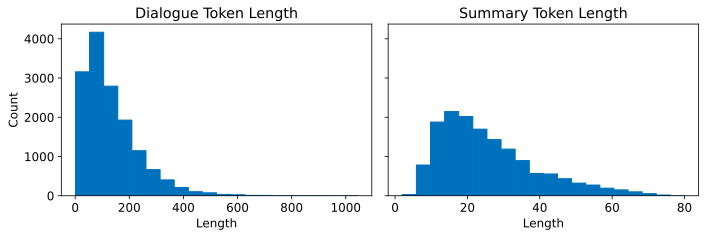

In [36]:
d_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["dialogue"]]
s_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["summary"]]

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0")
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")
axes[1].hist(s_len, bins=20, color="C0", edgecolor="C0")
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

In [37]:
# TrainerÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞ ÏÉùÏÑ±

def convert_examples_to_features(example_batch):
    input_encodings = tokenizer(example_batch["dialogue"], max_length=1024,
                                truncation=True)

    # with tokenizer.as_target_tokenizer():
    target_encodings = tokenizer(text_target=example_batch["summary"], max_length=128,
                                    truncation=True)

    return {"input_ids": input_encodings["input_ids"],
            "attention_mask": input_encodings["attention_mask"],
            "labels": target_encodings["input_ids"]}

dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features,
                                       batched=True)
columns = ["input_ids", "labels", "attention_mask"]
dataset_samsum_pt.set_format(type="torch", columns=columns)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

ÌÜ†ÌÅ∞Ìôî Îã®Í≥ÑÏóêÏÑú ÏÉàÎ°≠Í≤å Ï†ÅÏö©Ìïú Í≤ÉÏùÄ tokenizer.as_target_tokenizer()ÏûÑ
- Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÏûÖÎ†•Ïùò ÌÜ†ÌÅ∞Ìôî Íµ¨Î≥ÑÏùÑ ÏúÑÌï¥ withÎ¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÍ∞Ä ÎîîÏΩîÎçîÎ•º ÏúÑÌïú ÌÜ†ÌÅ∞ÌôîÏûÑÏùÑ Ïù∏ÏßÄÌïòÍ≥† Í∑∏Ïóê Îî∞Îùº ÏãúÌÄÄÏä§Î•º Ï≤òÎ¶¨Ìï† Ïàò ÏûàÏùå

PEGASUSÎäî Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ìä∏ÎûúÏä§Ìè¨Î®∏Ïù¥Í≥† , Í≥†Ï†ÑÏ†ÅÏù∏ Seq2Seq Íµ¨Ï°∞Î•º Ï∑®Ìï®
- seq2seq Íµ¨Ï°∞ÏóêÏÑúÎäî ÎîîÏΩîÎçîÏóê 'Ìã∞Ï≤ò Ìè¨Ïã±(teacher forcing)'ÏùÑ Ï†ÅÏö©ÌïòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†Å
- Ïù¥ Ï†ÑÎûµÏóêÏÑúÎäî ÎîîÏΩîÎçîÍ∞Ä Ïù∏ÏΩîÎçî Ï∂úÎ†• Ïô∏Ïóê Ìïú ÌÜ†ÌÅ∞Ïù¥ Ïù¥ÎèôÎêú Î†àÏù¥Î∏îÎ°ú Íµ¨ÏÑ±Îêú ÏûÖÎ†• ÌÜ†ÌÅ∞ÏùÑ Î∞õÏùå
  + Îî∞ÎùºÏÑú ÏïÑÎûò ÌëúÏ≤òÎüº Îã§Ïùå ÌÜ†ÌÅ∞ÏùÑ ÏúÑÌïú ÏòàÏ∏°ÏùÑ ÎßåÎì§ Îïå ÎîîÏΩîÎçîÎäî Ìïú ÌÜ†ÌÅ∞Ïù¥ Ïù¥ÎèôÎêú Ï†ïÎãµÏùÑ ÏûÖÎ†•ÏúºÎ°ú Î∞õÏùå

Ìïú Ïä§ÌÖù Ïù¥ÎèôÌïòÎ©¥ Í∑∏ Îã§Ïùå Ïä§ÌÖùÏùò Î†àÏù¥Î∏îÏùÑ ÏòàÏ∏°
- ÎîîÏΩîÎçîÎäî Ïù¥Ï†Ñ Ïä§ÌÖùÏùò Ï†ïÎãµ Î†àÏù¥Î∏îÎßå Î≥¥Î©∞ ÌòÑÏû¨ÏôÄ ÎØ∏ÎûòÏùò Î†àÏù¥Î∏îÏùÑ Î≥¥ÏßÄ Î™ªÌï®
- ÎîîÏΩîÎçîÎäî ÌòÑÏû¨ÏôÄ ÎØ∏ÎûòÏùò Î™®Îì† ÏûÖÎ†•ÏùÑ ÎßàÏä§ÌÇπÌïòÎäî ÎßàÏä§ÌÅ¨Îìú ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏùÑ Í∞ñÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ÎèôÏãúÌÇ§Îäî Í≤ÉÏúºÎ°ú Ï∂©Î∂ÑÌï®

Îî∞ÎùºÏÑú, Î∞∞ÏπòÎ•º Ï§ÄÎπÑÌï† Îïå Î†àÏù¥Î∏îÏùÑ Ìïú Ïä§ÌÖù Ïò§Î•∏Ï™ΩÏúºÎ°ú Ïù¥ÎèôÏãúÏºú ÎîîÏΩîÎçî ÏûÖÎ†•ÏùÑ ÎßåÎì¨
- Í∑∏Îü∞ Îã§Ïùå Î†àÏù¥Î∏îÏóê ÏûàÎäî Ìå®Îî© ÌÜ†ÌÅ∞Ïóê -100ÏúºÎ°ú ÏÑ§Ï†ïÌï¥ ÏÜêÏã§ Ìï®ÏàòÍ∞Ä Î¨¥ÏãúÌïòÎèÑÎ°ù ÎßåÎì¨

Îã§Îßå, `DataCollatorForSeq2Seq`ÏóêÏÑú Ïù¥Îü∞ ÏûëÏóÖÏùÑ Î™®Îëê Ï≤òÎ¶¨ÌïòÎØÄÎ°ú Ïã§Ï†úÎ°ú Ïù¥Î•º ÏàòÎèôÏúºÎ°ú Ìï† ÌïÑÏöîÎäî ÏóÜÏùå


In [38]:
# Ìã∞Ï≤ò Ìè¨Ïã±(teacher forcing)
# ÌÖçÏä§Ìä∏ ÏÉùÏÑ±ÏùÑ ÏúÑÌïú ÎîîÏΩîÎçî ÏûÖÎ†•Í≥º Î†àÏù¥Î∏îÏùò Ï†ïÎ†¨
text = ['PAD','Transformers', 'are', 'awesome', 'for', 'text', 'summarization']
rows = []
for i in range(len(text)-1):
    rows.append({'step': i+1, 'decoder_input': text[:i+1], 'label': text[i+1]})
pd.DataFrame(rows).set_index('step')

decoder_input          label
step                                                             
1                                            [PAD]   Transformers
2                              [PAD, Transformers]            are
3                         [PAD, Transformers, are]        awesome
4                [PAD, Transformers, are, awesome]            for
5           [PAD, Transformers, are, awesome, for]           text
6     [PAD, Transformers, are, awesome, for, text]  summarization

In [39]:
from transformers import DataCollatorForSeq2Seq

seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [40]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='pegasus-samsum', num_train_epochs=1, warmup_steps=500,
    per_device_train_batch_size=1, per_device_eval_batch_size=1,
    weight_decay=0.01, logging_steps=10, push_to_hub=True,
    evaluation_strategy='steps', eval_steps=500, save_steps=1e6,
    gradient_accumulation_steps=16)

In [41]:
from huggingface_hub import notebook_login

notebook_login()

In [42]:
trainer = Trainer(model=model, args=training_args,
                  tokenizer=tokenizer, data_collator=seq2seq_data_collator,
                  train_dataset=dataset_samsum_pt["train"],
                  eval_dataset=dataset_samsum_pt["validation"])

In [43]:
trainer.train()
score = evaluate_summaries_pegasus(
    dataset_samsum["test"], rouge_metric, trainer.model, tokenizer,
    batch_size=2, column_text="dialogue", column_summary="summary")

rouge_dict = dict((rn, score[rn]) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=[f"pegasus"])

{'loss': 3.0125, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.01}
{'loss': 3.0757, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.02}
{'loss': 3.0213, 'learning_rate': 3e-06, 'epoch': 0.03}
{'loss': 2.9849, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.04}
{'loss': 2.944, 'learning_rate': 5e-06, 'epoch': 0.05}
{'loss': 2.8877, 'learning_rate': 6e-06, 'epoch': 0.07}
{'loss': 2.8095, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.08}
{'loss': 2.6089, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.09}
{'loss': 2.6585, 'learning_rate': 9e-06, 'epoch': 0.1}
{'loss': 2.3516, 'learning_rate': 1e-05, 'epoch': 0.11}
{'loss': 2.3525, 'learning_rate': 1.1000000000000001e-05, 'epoch': 0.12}
{'loss': 2.242, 'learning_rate': 1.2e-05, 'epoch': 0.13}
{'loss': 2.1204, 'learning_rate': 1.3000000000000001e-05, 'epoch': 0.14}
{'loss': 2.1146, 'learning_rate': 1.4000000000000001e-05, 'epoch': 0.15}
{'loss': 2.0284, 'learning_rate': 1.5e-05, 'epoch': 0.16}
{'loss': 2.1071, 'learning

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 410/410 [07:38<00:00,  1.12s/it]


rouge1    rouge2    rougeL  rougeLsum
pegasus  0.428731  0.198836  0.339624   0.339739

In [44]:
pd.DataFrame(rouge_dict, index=[f"pegasus"])

rouge1    rouge2    rougeL  rougeLsum
pegasus  0.428731  0.198836  0.339624   0.339739

In [45]:
trainer.push_to_hub("Training complete!")

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.54k [00:00<?, ?B/s]

events.out.tfevents.1707732704.1cc9b8e867e4.193.0:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/youngbreadho/pegasus-samsum/commit/920e1c48b6fb63cc23e54652ed6b3c9d1c2e3440', commit_message='Training complete!', commit_description='', oid='920e1c48b6fb63cc23e54652ed6b3c9d1c2e3440', pr_url=None, pr_revision=None, pr_num=None)

### ÎåÄÌôî ÏöîÏïΩ ÏÉùÏÑ±ÌïòÍ∏∞

In [46]:
import transformers
transformers.logging.set_verbosity_error()

In [47]:
gen_kwargs = {"length_penalty": 0.8, "num_beams":8, "max_length": 128}
sample_text = dataset_samsum["test"][0]["dialogue"]
reference = dataset_samsum["test"][0]["summary"]
# `haesun`Î•º ÏûêÏã†Ïùò ÌóàÎ∏å ÏÇ¨Ïö©Ïûê Ïù¥Î¶ÑÏúºÎ°ú Î∞îÍæ∏ÏÑ∏Ïöî.
pipe = pipeline("summarization", model="youngbreadho/pegasus-samsum")

print("ÎåÄÌôî:")
print(sample_text)
print("\nÏ∞∏Ï°∞ ÏöîÏïΩ:")
print(reference)
print("\nÎ™®Îç∏ ÏöîÏïΩ:")
print(pipe(sample_text, **gen_kwargs)[0]["summary_text"])

config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.60M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

ÎåÄÌôî:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him üôÇ
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Ï∞∏Ï°∞ ÏöîÏïΩ:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact
Larry.

Î™®Îç∏ ÏöîÏïΩ:
Amanda can't find Betty's number. Larry called Betty last time they were at the
park together. Hannah wants Amanda to text Larry. Amanda will text Larry.


Ï∞∏Ï°∞ Î≤àÏó≠Í≥º ÎπÑÏä∑Ìï¥Ïßê
- Î™®Îç∏Ïù¥ Í∑∏ÎÉ• Î¨∏Ïû•ÏùÑ Ï∂îÏ∂úÌïòÏßÄ ÏïäÍ≥† ÎåÄÌôîÎ•º Ìï©ÏÑ±Ìï¥ÏÑú ÏöîÏïΩÏùÑ ÎßåÎìúÎäî Î≤ïÏùÑ Î∞∞Ïö¥Í≤É Í∞ôÏùå
- ÏûÑÏùòÎ°ú ÏûëÏÑ±Ìïú ÎåÄÌôîÏóêÏÑú ÌÉÄÎãπÏÑ± ÏûàÎäî ÏöîÏïΩÏùÑ ÏÉùÏÑ±Ìï®


In [48]:
custom_dialogue = """\
Thom: Hi guys, have you heard of transformers?
Lewis: Yes, I used them recently!
Leandro: Indeed, there is a great library by Hugging Face.
Thom: I know, I helped build it ;)
Lewis: Cool, maybe we should write a book about it. What do you think?
Leandro: Great idea, how hard can it be?!
Thom: I am in!
Lewis: Awesome, let's do it together!
"""
print(pipe(custom_dialogue, **gen_kwargs)[0]["summary_text"])

Thom, Lewis, Leandro and Leandro are going to write a book about transformers.
They are going to do it together, but it's not easy.


## Í≤∞Î°†

ÌÖçÏä§Ìä∏ ÏöîÏïΩÏùÄ Í∞êÏÑ± Î∂ÑÏÑù, Í∞úÏ≤¥Î™Ö Ïù∏Ïãù, ÏßàÎ¨∏ ÎãµÎ≥ÄÍ≥º Í∞ôÏù¥ Î∂ÑÎ•ò ÏûëÏóÖÏúºÎ°ú Íµ¨ÏÑ±ÎêòÎäî ÏûëÏóÖÏóê ÎπÑÌï¥ ÌäπÏàòÌïú Ïñ¥Î†§ÏõÄÏù¥ Î™á Í∞ÄÏßÄ ÏûàÏùå
- Ï†ïÌôïÎèÑ Í∞ôÏùÄ Ï†ÑÌÜµÏ†ÅÏù∏ ÏßÄÌëúÎäî ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Ïùò ÌíàÏßàÏùÑ Î∞òÏòÅÌïòÏßÄ Î™ªÌï®
- Ïù¥ Ïû•ÏóêÏÑú Î≥¥ÏïòÎìØÏù¥ BLEUÏôÄ ROUGE ÏßÄÌëúÍ∞Ä ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Î•º Ïûò ÌèâÍ∞ÄÌïòÏßÄÎßå ÏÇ¨ÎûåÏùò ÌåêÎã®Ïù¥ ÌïÑÏöîÌïú Í≤ΩÏö∞ÎèÑ ÎßéÏùå

ÏöîÏïΩ Î™®Îç∏Î°ú ÏûëÏóÖÌï† ÎïåÎäî Ï£ºÎ°ú Î™®Îç∏Ïùò Î¨∏Îß• ÌÅ¨Í∏∞Î≥¥Îã§ Í∏¥ ÌÖçÏä§Ìä∏Î•º Ïñ¥ÎñªÍ≤å ÏöîÏïΩÌï†ÏßÄÏóê ÏùòÎ¨∏Ïù¥ ÏÉùÍπÄ
- ÏïàÌÉÄÍπùÍ≤åÎèÑ Ïù¥ Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï† Ïàò ÏûàÎäî Îã®Ïùº Ï†ÑÎûµÏùÄ ÏóÜÏùå
- ÏïÑÏßÅÍπåÏßÄÎèÑ ÌôúÎ∞úÌïòÍ≤å Ïó∞Íµ¨ÎêòÍ≥† ÏûàÎäî Î¨∏Ï†ú
  * OpenAIÏùò ÏµúÍ∑º Ïó∞Íµ¨Îäî Í∏¥ Î¨∏ÏÑúÏóêÏÑú Î∞òÎ≥µÏ†ÅÏúºÎ°ú Î™®Îç∏ÏùÑ Ï†ÅÏö©ÌïòÍ≥† ÏÇ¨ÎûåÏùò ÌîºÎìúÎ∞±ÏùÑ Î∞òÎ≥µ Î£®ÌîÑÏóê Ï∂îÍ∞ÄÌï¥ ÏöîÏïΩ ÏûëÏóÖÏùò Ïä§ÏºÄÏùºÏùÑ ÌôïÏû•Ìïò